In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot
import os


In [2]:
def get_category_file_name(folder_path):
    category_file_list = []
    folder_content = os.listdir(folder_path)
    for item in folder_content:
        if (item.endswith("_category_id.json")):
            category_file_list.append(item)
    return category_file_list


def get_video_file_list(folder_path):
    video_file_list = []
    folder_content = os.listdir(folder_path)
    for item in folder_content:
        if (item.endswith("videos.csv")):
            video_file_list.append(item)
    return video_file_list

In [3]:
test_path = "/home/james/python_practice/archive"

category_list = get_category_file_name(test_path)
video_list = get_video_file_list(test_path)

for  i in category_list :
    print(i)
for i in video_list : 
    print(i)

JP_category_id.json
DE_category_id.json
FR_category_id.json
RU_category_id.json
MX_category_id.json
GB_category_id.json
KR_category_id.json
IN_category_id.json
CA_category_id.json
US_category_id.json
KRvideos.csv
DEvideos.csv
MXvideos.csv
RUvideos.csv
USvideos.csv
FRvideos.csv
INvideos.csv
GBvideos.csv
CAvideos.csv
JPvideos.csv


In [4]:

def get_category_df(file_name):
    df = pd.read_json(file_name)
    data = pd.json_normalize(df['items'])
    select = data[['id','snippet.title']]
    return select
    
def get_data_df(file_name):
    area = file_name[file_name.index("archive/") + 8 :file_name.index("videos.csv")]
    df = pd.read_csv(file_name)
    df['area'] = area
    return df


In [5]:

        
skip=set(("JP","KR","MX","RU"))    

for skip_item in skip:
    for  category_item in category_list :
        if skip_item in category_item:
            category_list.remove(category_item)
            continue

for skip_item in skip:
    for  video_item in video_list :
        if skip_item in video_item:
            video_list.remove(video_item)
            continue


In [6]:
## 抓出所有影片和分類
test_path = "/home/james/python_practice/archive/"
data_df_list  = []
for  video_item in video_list :
    data_df_list.append(get_data_df(test_path + video_item))
data_df = pd.concat(data_df_list, ignore_index=True)          
    

category_df_list =[]

for  category_item in category_list :
     category_df_list.append(get_category_df(test_path + category_item))


category_df = pd.concat(category_df_list)        
category_df = category_df.drop_duplicates()

data_df["category_id"] = data_df["category_id"].astype(int)
category_df["id"] = category_df["id"].astype(int)

merge_df =pd.merge(data_df, category_df, left_on="category_id", right_on="id")
display(merge_df)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,area,id,snippet.title
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,DE,24,Entertainment
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",DE,24,Entertainment
2,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,DE,24,Entertainment
3,2hu_evXPpMM,17.14.11,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,HerrNewstime,24,2017-11-12T16:33:18.000Z,"Dagi Bee|""Heiraten""|""Coldmirror""|""YouTube""|""Tr...",228574,11349,990,1049,https://i.ytimg.com/vi/2hu_evXPpMM/default.jpg,False,False,False,Dagi Bee wird Heiraten | Coldmirror bekommt Eh...,DE,24,Entertainment
4,OKYUtHvgMhc,17.14.11,Die Welt in 30 Jahren - Sommer 2047 - VOLKAN,VOLKAN,24,2017-11-12T16:09:44.000Z,"Welt|""Natur""|""Umwelt""|""Klima""|""Klimawandel""",37877,1839,327,170,https://i.ytimg.com/vi/OKYUtHvgMhc/default.jpg,False,False,False,"Über die Zukunft nachzudenken macht Spaß, oder...",DE,24,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239657,l7E0kTvARsA,18.01.06,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31T13:30:04.000Z,"full movie|""full punjabi movie""|""golak""|""bugni...",781977,22027,783,1096,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,False,False,False,Rhythm Boyz Entertainment & Hayre Omjee Studio...,CA,30,Movies
239658,l7E0kTvARsA,18.02.06,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31T13:30:04.000Z,"full movie|""full punjabi movie""|""golak""|""bugni...",2289027,41807,1811,2153,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,False,False,False,Rhythm Boyz Entertainment & Hayre Omjee Studio...,CA,30,Movies
239659,l7E0kTvARsA,18.03.06,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31T13:30:04.000Z,"full movie|""full punjabi movie""|""golak""|""bugni...",3523444,52355,2520,3000,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,False,False,False,Rhythm Boyz Entertainment & Hayre Omjee Studio...,CA,30,Movies
239660,l7E0kTvARsA,18.04.06,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,2018-05-31T13:30:04.000Z,"full movie|""full punjabi movie""|""golak""|""bugni...",4638549,60148,3160,3441,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,False,False,False,Rhythm Boyz Entertainment & Hayre Omjee Studio...,CA,30,Movies


In [7]:
## 列出所有 rap 的 dislike 數量
rap_df = merge_df[merge_df['tags'].str.contains("rap")]
display (rap_df[['title','tags','dislikes']])

,title,tags,dislikes
0,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",230
9,CAPO - ALLES AUF ROT - TOURBLOG #5,"capo|""hallo monaco""|""alles auf rot""|""lambo dia...",69
15,Eminem Performs 'Walk On Water' | MTV EMAs 201...,"mtv|""uk""|""official""|""Eminem""|""walk on water""|""...",272
18,Rezo & Kelly MissesVlog - 18 SONGS (Sing-off) ...,"analyse|""musik""|""youtube""|""musiker""|""bewertung...",119
21,STRANGER THINGS THEME trifft auf WEST COAST VI...,"stranger things theme|""west coast beat""|""beat ...",21
...,...,...,...
239349,INDIAN FOOD HEAVEN at the BIGGEST MEGA KITCHEN...,"indian street food|""indian food""|""golden templ...",231
239352,INDIAN FOOD HEAVEN at the BIGGEST MEGA KITCHEN...,"indian street food|""indian food""|""golden templ...",297
239453,FlipTop - Sinio/Tipsy D vs Shernan/M Zhayt @ D...,"fliptop|""sinio""|""tipsy d""|""shernan""|""m zhayt""|...",1270
239457,FlipTop - Sinio/Tipsy D vs Shernan/M Zhayt @ D...,"fliptop|""sinio""|""tipsy d""|""shernan""|""m zhayt""|...",1975


,area,time_hour,likes
0,CA,0,36876.233807
1,CA,1,30390.174185
2,CA,2,23261.373668
3,CA,3,30408.685801
4,CA,4,76158.435472
...,...,...,...
139,US,19,57757.629925
140,US,20,58025.066948
141,US,21,78681.911122
142,US,22,64945.376723


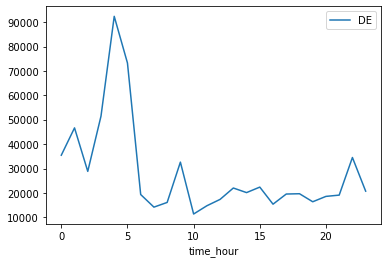

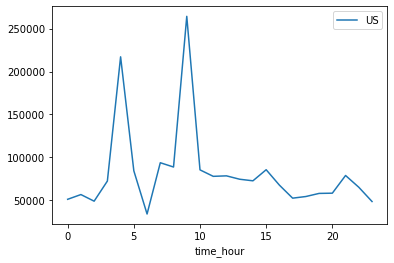

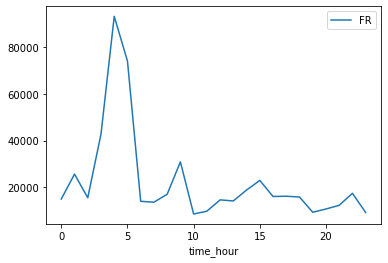

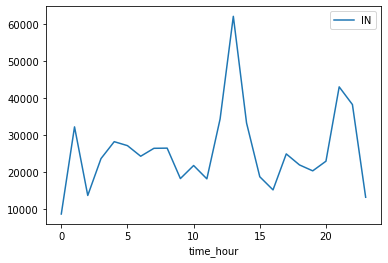

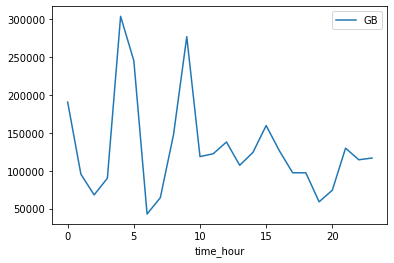

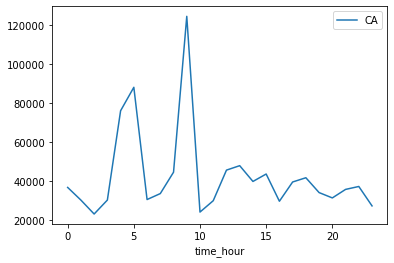

In [8]:
## 列出發布時間與地區 和 喜歡人數的線性關係

relation_df =merge_df.copy()
relation_df['publish_time']=pd.to_datetime(relation_df['publish_time'], infer_datetime_format=True)
relation_df.loc[:,'time_hour'] = pd.DatetimeIndex(relation_df['publish_time']).hour

relation_df = relation_df.groupby(['area','time_hour'], as_index=False)['likes'].mean()
display(relation_df)

area_array =merge_df['area'].unique()
for i in area_array :
    pd_each = relation_df[relation_df['area'] ==i]
    area = i
    pd_each.plot(x='time_hour', y ='likes',label =area)

In [11]:
## 前十名最不喜歡類別

dislike_df = merge_df.copy()
dislike_df = dislike_df.groupby(['snippet.title'], as_index=False)['dislikes'].sum().sort_values(by='dislikes',ascending=False)
display(dislike_df.head(10))

,snippet.title,dislikes
8,Music,270435932
3,Entertainment,217151438
11,People & Blogs,39704523
1,Comedy,30159084
15,Sports,23950565
4,Film & Animation,22652042
5,Gaming,17359338
9,News & Politics,17107498
10,Nonprofits & Activism,16319377
6,Howto & Style,11054249


In [12]:
## 排序出前十名的類別 喜歡 和 不喜歡的比例 擁有最大的變異數
var_df = merge_df[['snippet.title','dislikes','likes']]
var_df = var_df.rename({'snippet.title': 'category'}, axis=1) 
var_df=var_df.assign(**{"ratio":var_df["likes"]/(var_df["likes"]+var_df["dislikes"])})

var_df['ratio_var']=var_df['ratio'].var()


var_df = var_df.groupby('category',as_index=False)[['ratio']].var().head(10)\
    .sort_values(by=['ratio'],ascending=False)
display(var_df)

,category,ratio
9,News & Politics,0.024562
3,Entertainment,0.011710
0,Autos & Vehicles,0.010287
4,Film & Animation,0.008383
5,Gaming,0.007659
2,Education,0.004565
6,Howto & Style,0.003928
8,Music,0.003099
1,Comedy,0.002902
7,Movies,0.001479
